In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dolfinx.fem import Function, FunctionSpace
from dolfinx.cpp.log import LogLevel
from petsc4py.PETSc import ScalarType
from steady_state_adv_diff import *

LogLevel(-9)

plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex = False)
plt.rc('font', **{'family' : "sans-serif"})
plt.rcParams.update({'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']})

Peclet number =  0.25
Peclet number =  0.25
Peclet number =  0.9000000000000001
Peclet number =  0.9000000000000001
Peclet number =  5.0
Peclet number =  5.0


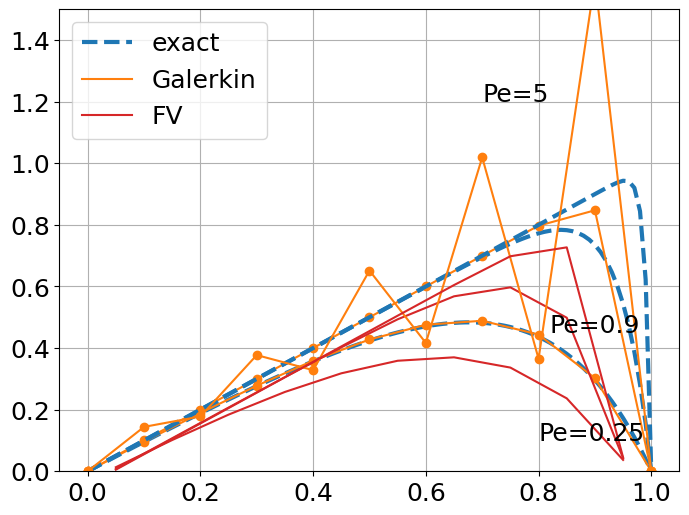

In [2]:
# Reproducing Fig 2.1 of the book Finite Element Methods for Flow Problems

source = 1.0

left_bc = 0
right_bc = 0

x_space = np.linspace(0,1,101)
x_space_fem= np.linspace(0,1,11)

# Pe = 0.25
u_galerkin_1, coord_1 = steady_adv_diff_1d(0.2, 1, 10, source, left_bc, right_bc)
u_FV_1, coord_FV_1 = steady_adv_diff_1d_FV(0.2, 10, source, left_bc, right_bc)
u_solution_1 = solution_fig2_1(x_space, 0.2)

# Pe = 0.9
u_galerkin_2, coord_2 = steady_adv_diff_1d(1.0/18, 1, 10, source, left_bc, right_bc)
u_FV_2, coord_FV_2 = steady_adv_diff_1d_FV(1.0/18, 10, source, left_bc, right_bc)
u_solution_2 = solution_fig2_1(x_space, 1.0/18)

# Pe = 5
u_galerkin_3, coord_3 = steady_adv_diff_1d(1.0/100, 1, 10, source, left_bc, right_bc)
u_FV_3, coord_FV_3 = steady_adv_diff_1d_FV(1.0/100, 10, source, left_bc, right_bc)
u_solution_3 = solution_fig2_1(x_space, 1.0/100)

plt.figure(figsize=(8, 6))
plt.plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
plt.plot(coord_1, u_galerkin_1.vector.array, c='C1', label = 'Galerkin')
plt.plot(coord_1, u_galerkin_1.vector.array, 'o', c='C1')
plt.plot(coord_FV_1, u_FV_1.vector.array, c='C3', label = 'FV')
plt.text(0.8, 0.1, 'Pe=0.25')

plt.plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
plt.plot(coord_2, u_galerkin_2.vector.array, c='C1')
plt.plot(coord_2, u_galerkin_2.vector.array, 'o', c='C1')
plt.plot(coord_FV_2, u_FV_2.vector.array, c='C3')
plt.text(0.82, 0.45, 'Pe=0.9')

plt.plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
plt.plot(coord_3, u_galerkin_3.vector.array, c='C1')
plt.plot(coord_3, u_galerkin_3.vector.array, 'o', c='C1')
plt.plot(coord_FV_3, u_FV_3.vector.array, c='C3')
plt.text(0.7, 1.2, 'Pe=5')

plt.ylim(0, 1.5)
plt.grid()
plt.legend()
plt.show()

Peclet number =  0.049999999999999996
Peclet number =  0.18000000000000002
Peclet number =  1.0


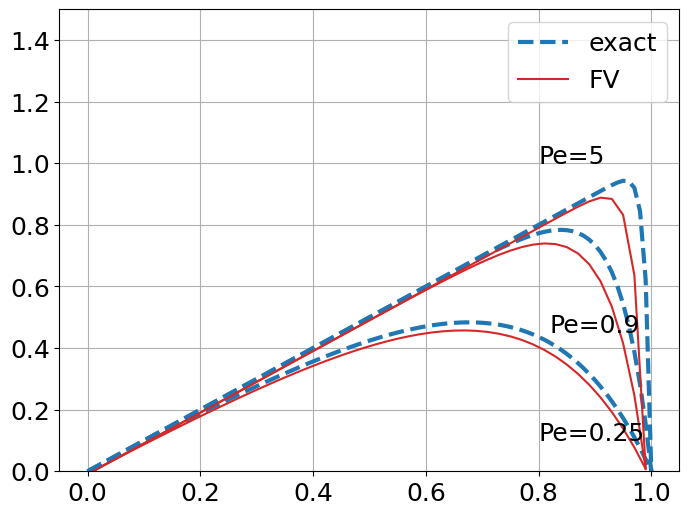

In [3]:
# Finite volume methods are diffusive, but does not break down when Pe > 1. Furthermore, the solution converges 
# to exact solution when mesh is refined.

source = 1.0

left_bc = 0
right_bc = 0

x_space = np.linspace(0,1,101)
x_space_fem= np.linspace(0,1,11)

# Pe = 0.25
u_FV_1, coord_FV_1 = steady_adv_diff_1d_FV(0.2, 50, source, left_bc, right_bc)
u_solution_1 = solution_fig2_1(x_space, 0.2)

# Pe = 0.9
u_FV_2, coord_FV_2 = steady_adv_diff_1d_FV(1.0/18, 50, source, left_bc, right_bc)
u_solution_2 = solution_fig2_1(x_space, 1.0/18)

# Pe = 5
u_FV_3, coord_FV_3 = steady_adv_diff_1d_FV(1.0/100, 50, source, left_bc, right_bc)
u_solution_3 = solution_fig2_1(x_space, 1.0/100)

plt.figure(figsize=(8, 6))
plt.plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
plt.plot(coord_FV_1, u_FV_1.vector.array, c='C3', label = 'FV')
plt.text(0.8, 0.1, 'Pe=0.25')

plt.plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
plt.plot(coord_FV_2, u_FV_2.vector.array, c='C3')
plt.text(0.82, 0.45, 'Pe=0.9')

plt.plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
plt.plot(coord_FV_3, u_FV_3.vector.array, c='C3')
plt.text(0.8, 1.0, 'Pe=5')

plt.ylim(0,1.5)
plt.grid()
plt.legend()
plt.show()

Peclet number =  0.5
Peclet number =  1.8000000000000003
Peclet number =  10.0


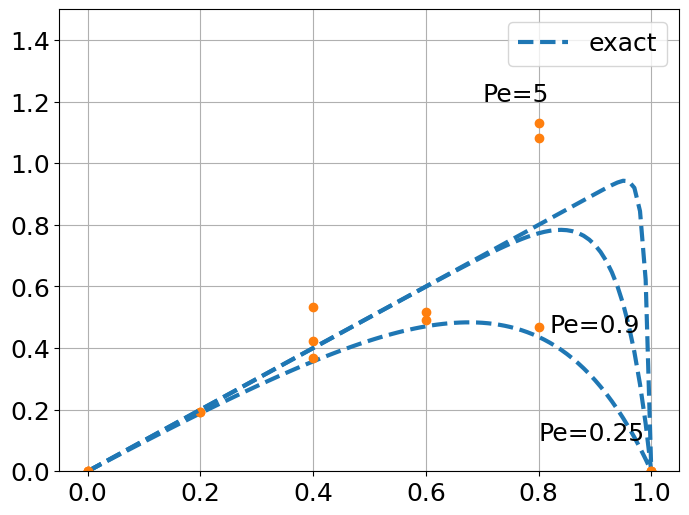

In [4]:
# Reproducing Fig 2.6 of the book Finite Element Methods for Flow Problems

# TODO: Evaluate values for second order Lagrangian elements

nx = 101
x_space = np.linspace(0, 1, nx)
x_space_fem = np.linspace(0, 1, 11)

order = 2
nx = 5

source = 1.0

left_bc = 0
right_bc = 0

u_galerkin_1, coord_1 = steady_adv_diff_1d(0.2, order, nx, source, left_bc, right_bc)
u_solution_1 = solution_fig2_1(x_space, 0.2)
ind_1 = np.argsort(coord_1)

# u_galerkin_1_sample = Function(CG_space)
# u_galerkin_1_sample.interpolate(u_galerkin_1)

# Pe = 0.9
u_galerkin_2, coord_2 = steady_adv_diff_1d(1.0/18, order, nx, source, left_bc, right_bc)
u_solution_2 = solution_fig2_1(x_space, 1.0/18)
ind_2 = np.argsort(coord_2)

# u_galerkin_2_sample = Function(CG_space)
# u_galerkin_2_sample.interpolate(u_galerkin_2)

# Pe = 5
u_galerkin_3, coord_3 = steady_adv_diff_1d(1.0/100, order, nx, source, left_bc, right_bc)
u_solution_3 = solution_fig2_1(x_space, 1.0/100)
ind_3 = np.argsort(coord_3)

# u_galerkin_3_sample = Function(CG_space)
# u_galerkin_3_sample.interpolate(u_galerkin_3)

plt.figure(figsize=(8, 6))
plt.plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
plt.plot(coord_1, u_galerkin_1.vector.array, 'o', c='C1')
plt.text(0.8, 0.1, 'Pe=0.25')

plt.plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
plt.plot(coord_2, u_galerkin_2.vector.array, 'o', c='C1')
plt.text(0.82, 0.45, 'Pe=0.9')

plt.plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
plt.plot(coord_3, u_galerkin_3.vector.array, 'o', c='C1')
plt.text(0.7, 1.2, 'Pe=5')

plt.ylim(0,1.5)
plt.grid()
plt.legend()
plt.show()

Peclet number =  0.25
Peclet number =  0.9000000000000001
Peclet number =  5.0


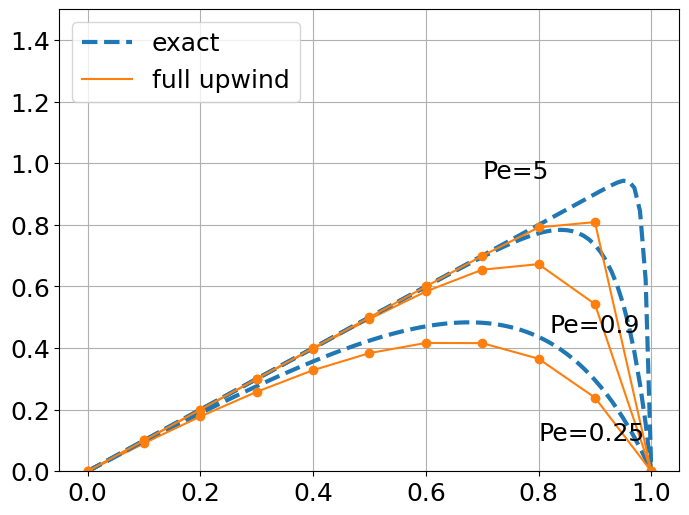

In [5]:
# Reproducing Fig 2.7 of the book Finite Element Methods for Flow Problems

nx = 10
mesh_1d = create_interval(MPI.COMM_WORLD, nx, (0.0, 1.0))

source = 1.0

left_bc = 0
right_bc = 0

x_space = np.linspace(0, 1, 101)
x_space_fem= np.linspace(0, 1, 11)

# Pe = 0.25
u_SU_1, coord_1 = steady_adv_diff_1d_SU(0.2, 1, nx, mesh_1d, 'full_upwind', source, left_bc, right_bc)
u_solution_1 = solution_fig2_1(x_space, 0.2)
ind_1 = np.argsort(coord_1)

# Pe = 0.9
u_SU_2, coord_2 = steady_adv_diff_1d_SU(1.0/18, 1, nx, mesh_1d, 'full_upwind', source, left_bc, right_bc)
u_solution_2 = solution_fig2_1(x_space, 1.0/18)

# Pe = 5
u_SU_3, coord_3 = steady_adv_diff_1d_SU(1.0/100, 1, nx, mesh_1d, 'full_upwind', source, left_bc, right_bc)
u_solution_3 = solution_fig2_1(x_space, 1.0/100)

plt.figure(figsize=(8, 6))
plt.plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
plt.plot(coord_1, u_SU_1.vector[:], c='C1', label = 'full upwind')
plt.plot(coord_1, u_SU_1.vector[:], 'o', c='C1')
plt.text(0.8, 0.1, 'Pe=0.25')

plt.plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
plt.plot(coord_2, u_SU_2.vector[:], c='C1')
plt.plot(coord_2, u_SU_2.vector[:], 'o', c='C1')
plt.text(0.82, 0.45, 'Pe=0.9')

plt.plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
plt.plot(coord_3, u_SU_3.vector[:], c='C1')
plt.plot(coord_3, u_SU_3.vector[:], 'o', c='C1')
plt.text(0.7, 0.95, 'Pe=5')

plt.ylim(0,1.5)
plt.grid()
plt.legend(loc='upper left')
plt.show()

Peclet number =  0.25
Peclet number =  0.9000000000000001
Peclet number =  5.0


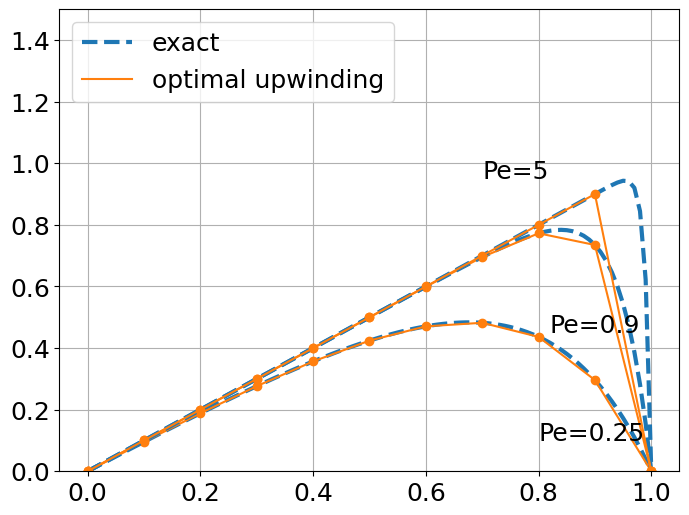

In [6]:
# Reproducing Fig 2.12 of the book Finite Element Methods for Flow Problems

nx = 10
mesh_1d = create_interval(MPI.COMM_WORLD, nx, (0.0, 1.0))

source = Constant(mesh_1d, 1.0)

left_bc = 0
right_bc = 0

x_space = np.linspace(0,1,101)
x_space_fem= np.linspace(0,1,11)

# Pe = 0.25
u_SU_1, coord_1 = steady_adv_diff_1d_SU(0.2, 1, 10, mesh_1d, 'optimal', source, left_bc, right_bc)
u_solution_1 = solution_fig2_1(x_space, 0.2)
ind_1 = np.argsort(coord_1)

# Pe = 0.9
u_SU_2, coord_2 = steady_adv_diff_1d_SU(1.0/18, 1, 10, mesh_1d, 'optimal', source, left_bc, right_bc)
u_solution_2 = solution_fig2_1(x_space, 1.0/18)

# Pe = 5
u_SU_3, coord_3 = steady_adv_diff_1d_SU(1.0/100, 1, 10, mesh_1d, 'optimal', source, left_bc, right_bc)
u_solution_3 = solution_fig2_1(x_space, 1.0/100)

plt.subplots(1, 1, figsize=(8, 6))
plt.plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
plt.plot(coord_1, u_SU_1.vector[:], c='C1', label = 'optimal upwinding')
plt.plot(coord_1, u_SU_1.vector[:], 'o', c='C1')
plt.text(0.8, 0.1, 'Pe=0.25')

plt.plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
plt.plot(coord_2, u_SU_2.vector[:], c='C1')
plt.plot(coord_2, u_SU_2.vector[:], 'o', c='C1')
plt.text(0.82, 0.45, 'Pe=0.9')

plt.plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
plt.plot(coord_3, u_SU_3.vector[:], c='C1')
plt.plot(coord_3, u_SU_3.vector[:], 'o', c='C1')
plt.text(0.7, 0.95, 'Pe=5')

plt.ylim(0,1.5)
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [7]:
# Reproducing Fig 2.13 of the book Finite Element Methods for Flow Problems
# Pe = 5, 10 linear elements.

nx = 10

mesh_1d = create_interval(MPI.COMM_WORLD, nx, (0.0, 1.0))
CG_space = FunctionSpace(mesh_1d, ('CG', 1))
x_space = CG_space.tabulate_dof_coordinates().T[0]

s = Function(CG_space)
s.interpolate(lambda x: 5.0*(np.exp(-100*pow(x[0]-0.125, 2)) - np.exp(-100*pow(x[0]-0.25, 2))))

left_bc = 0
right_bc = 0

# Pe = 5
u_SU_1_linear, coord_1_linear = steady_adv_diff_1d_SU(1.0/100, 1, nx, mesh_1d, 'optimal', s, left_bc, right_bc)
u_SUPG_1_linear, coord_2_linear = steady_adv_diff_1d_SUPG(1.0/100, 1, nx, mesh_1d, s, left_bc, right_bc)

# ind_1_linear = np.argsort(coord_1_linear)
# ind_2_linear = np.argsort(coord_2_linear)

Peclet number =  5.0
Peclet number =  5.0


Peclet number =  10.0
Peclet number =  5.0


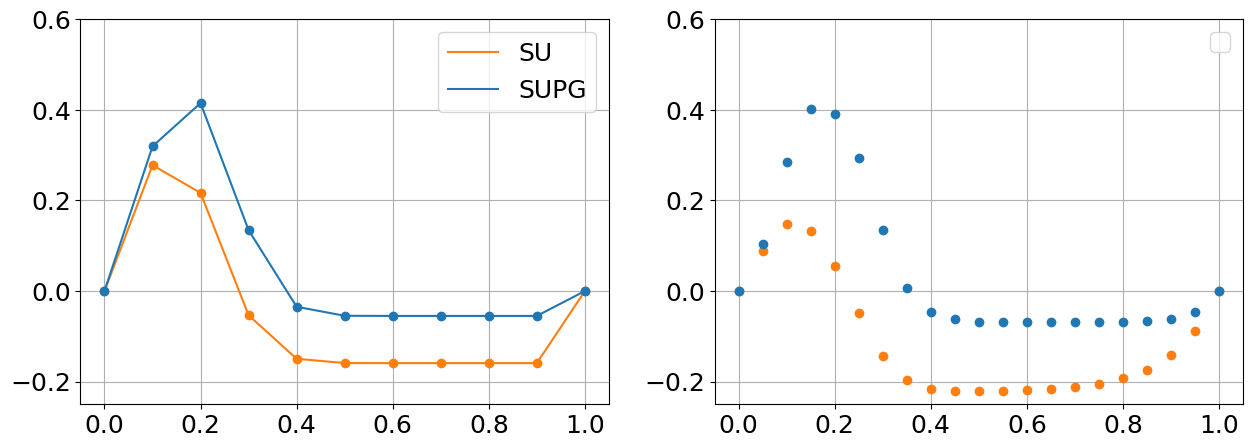

In [8]:
# Reproducing Fig 2.13 of the book Finite Element Methods for Flow Problems
# Pe = 5, 5 Quadratic elements.

order = 2
nx = 5

left_bc = 0
right_bc = 0

# Pe = 5
u_SU_1, coord_1 = steady_adv_diff_1d_SU(1.0/100, order, nx, mesh_1d, 'optimal', s, left_bc, right_bc)
u_SUPG_1, coord_2 = steady_adv_diff_1d_SUPG(1.0/100, order, nx, mesh_1d, s, left_bc, right_bc)

x_space = np.linspace(0,1,101)

# u_SU_1_sample = []
# for x in x_space:
#     u_SU_1_sample.append(u_SU_1(Point(x)))

# u_SUPG_1_sample = []
# for x in x_space:
#     u_SUPG_1_sample.append(u_SUPG_1(Point(x)))
    
ind_1 = np.argsort(coord_1)
ind_2 = np.argsort(coord_2)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(coord_1_linear, u_SU_1_linear.vector[:], c='C1', label = 'SU')
ax[0].plot(coord_1_linear, u_SU_1_linear.vector[:], 'o', c='C1')
ax[0].plot(coord_2_linear, u_SUPG_1_linear.vector[:], c='C0', label = 'SUPG')
ax[0].plot(coord_2_linear, u_SUPG_1_linear.vector[:], 'o', c='C0')
ax[0].grid()
ax[0].legend(loc='upper right')
ax[0].set_ylim(-0.25, 0.6)

# ax[1].plot(x_space, u_SU_1_sample, c='C1', label = 'SU')
ax[1].plot(coord_1, u_SU_1.vector[:], 'o', c='C1')
# ax[1].plot(x_space, u_SUPG_1_sample, c='C0', label = 'SUPG')
ax[1].plot(coord_2, u_SUPG_1.vector[:], 'o', c='C0')
ax[1].grid()
ax[1].legend(loc='upper right')
ax[1].set_ylim(-0.25, 0.6)

plt.show()

Peclet number =  5.0


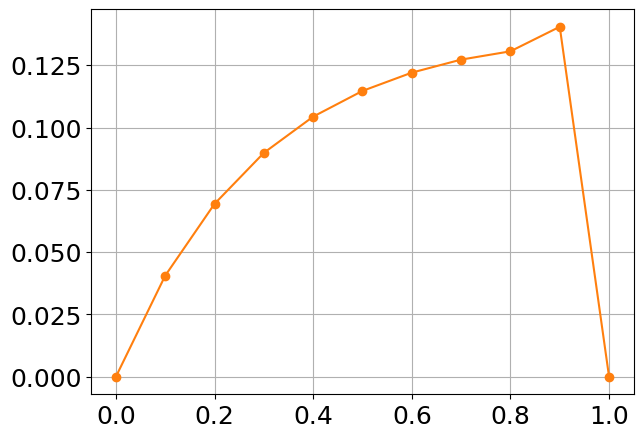

In [9]:
# Reproducing Fig 2.14 of the book Finite Element Methods for Flow Problems
# I cannot find the correct source term for this problem

#source = Expression('(x[0] < 1.0 && x[0] > 0.0)\
#? 1.0 : 0.0', degree=1)
u_GLS_1, coord_1 = steady_adv_diff_1d_GLS(mu=1e-2, sigma=10, order=1, nx=10, s=0.4, left_bc=0, right_bc=0)
#ind_1 = np.argsort(coord_1)


fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(coord_1, u_GLS_1.vector[:], c='C1', label = 'SU')
ax.plot(coord_1, u_GLS_1.vector[:], 'o', c='C1')
ax.grid()
plt.show()

In [10]:
# Reproducing Fig 2.15 of the book Finite Element Methods for Flow Problems
# Standard Galerkin Solution

def solution_fig2_15(x_space, mu):
    adv = 1
    
    return (1.0-np.exp(adv/mu*x_space))/(1.0 - np.exp(adv/mu)) 

source = 1e-15

left_bc = 0
right_bc = 1.0

x_space = np.linspace(0,1,101)
x_space_fem= np.linspace(0,1,11)

# Pe = 0.25
u_galerkin_1, coord_1 = steady_adv_diff_1d(0.2, 1, 10, source, left_bc, right_bc)
u_solution_1 = solution_fig2_15(x_space, 0.2)
u_SU_1, coord_1 = steady_adv_diff_1d_SU(0.2, 1, 10, mesh_1d, 'full_upwind', source, left_bc, right_bc)
u_SUPG_1, coord_1 = steady_adv_diff_1d_SUPG(0.2, 1, 10, mesh_1d, source, left_bc, right_bc)
u_FV_1, coord_FV_1 = steady_adv_diff_1d_FV(0.2, 20, source, left_bc, right_bc)


# Pe = 0.9
u_galerkin_2, coord_2 = steady_adv_diff_1d(1.0/18, 1, 10, source, left_bc, right_bc)
u_solution_2 = solution_fig2_15(x_space, 1.0/18)
u_SU_2, coord_2 = steady_adv_diff_1d_SU(1.0/18, 1, 10, mesh_1d, 'full_upwind', source, left_bc, right_bc)
u_SUPG_2, coord_2 = steady_adv_diff_1d_SUPG(1.0/18, 1, 10, mesh_1d, source, left_bc, right_bc)
u_FV_2, coord_FV_2 = steady_adv_diff_1d_FV(1.0/18, 20, source, left_bc, right_bc)

# Pe = 5
u_galerkin_3, coord_3 = steady_adv_diff_1d(1.0/100, 1, 10, source, left_bc, right_bc)
u_solution_3 = solution_fig2_15(x_space, 1.0/100)
u_SU_3, coord_3 = steady_adv_diff_1d_SU(1.0/100, 1, 10, mesh_1d, 'full_upwind', source, left_bc, right_bc)
u_SUPG_3, coord_3 = steady_adv_diff_1d_SUPG(1.0/100, 1, 10, mesh_1d, source, left_bc, right_bc)
u_FV_3, coord_FV_3 = steady_adv_diff_1d_FV(1.0/100, 20, source, left_bc, right_bc)

Peclet number =  0.25
Peclet number =  0.25
Peclet number =  0.25
Peclet number =  0.125
Peclet number =  0.9000000000000001
Peclet number =  0.9000000000000001
Peclet number =  0.9000000000000001
Peclet number =  0.45000000000000007
Peclet number =  5.0
Peclet number =  5.0
Peclet number =  5.0
Peclet number =  2.5


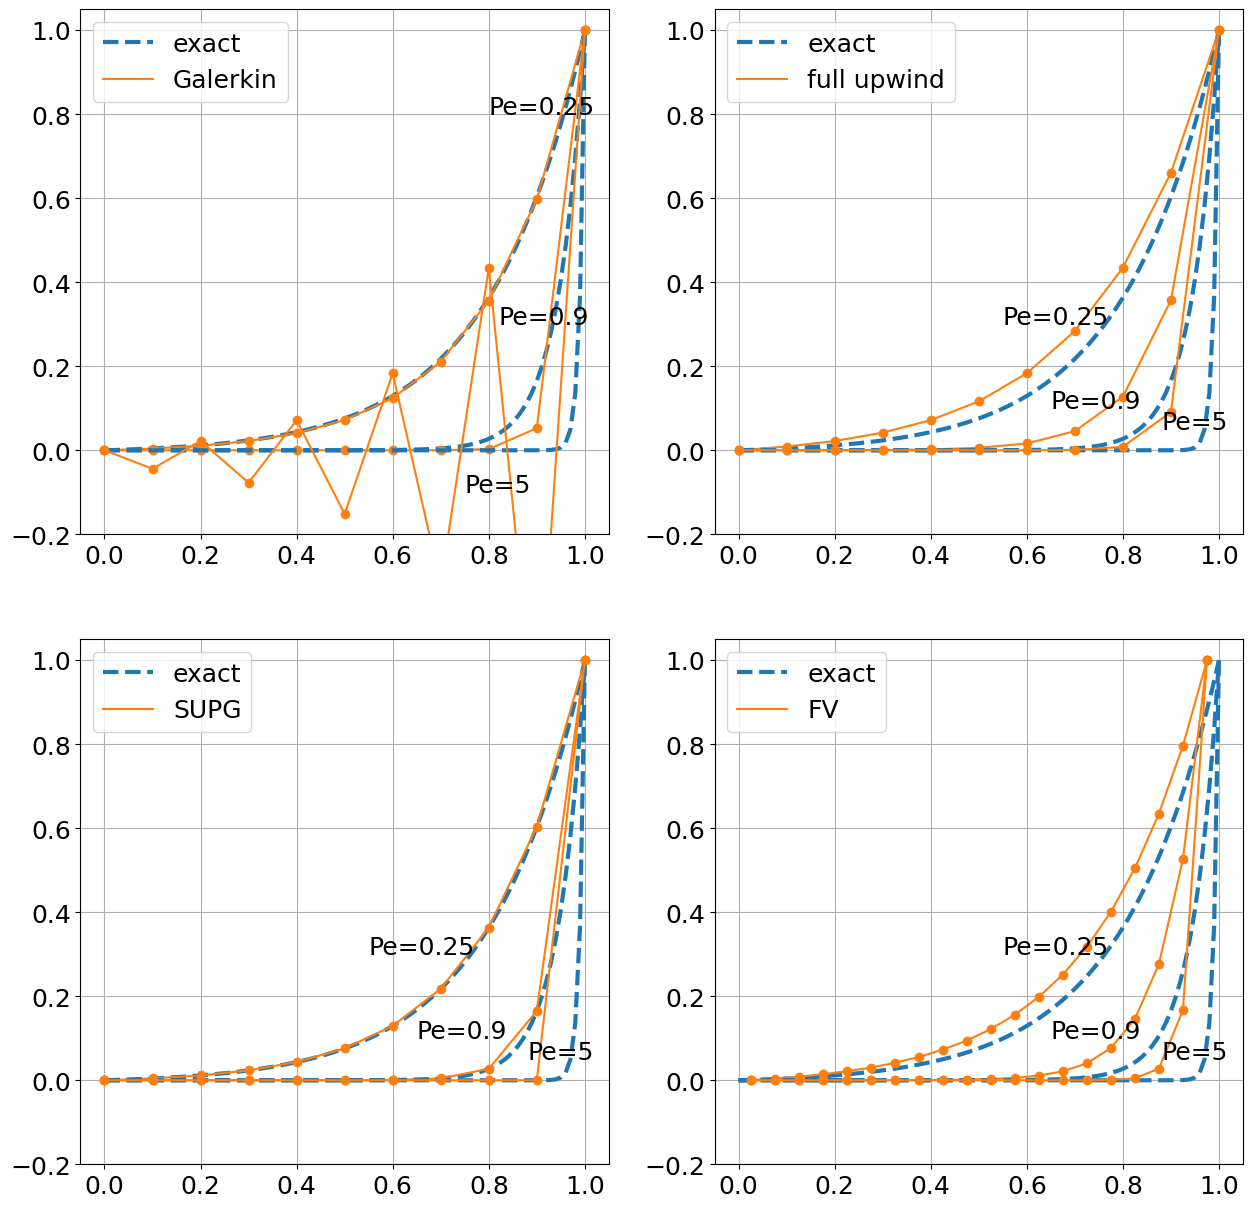

In [11]:
# Reproducing Fig 2.15 of the book Finite Element Methods for Flow Problems

fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
ax[0,0].plot(coord_1, u_galerkin_1.vector[:], c='C1', label = 'Galerkin')
ax[0,0].plot(coord_1, u_galerkin_1.vector[:], 'o', c='C1')
ax[0,0].text(0.8, 0.8, 'Pe=0.25')

ax[0,0].plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
ax[0,0].plot(coord_2, u_galerkin_2.vector[:], c='C1')
ax[0,0].plot(coord_2, u_galerkin_2.vector[:], 'o', c='C1')
ax[0,0].text(0.82, 0.3, 'Pe=0.9')

ax[0,0].plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
ax[0,0].plot(coord_3, u_galerkin_3.vector[:], c='C1')
ax[0,0].plot(coord_3, u_galerkin_3.vector[:], 'o', c='C1')
ax[0,0].text(0.75, -0.1, 'Pe=5')

ax[0,0].set_ylim(-0.2,1.05)
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
ax[0,1].plot(coord_1, u_SU_1.vector[:], c='C1', label = 'full upwind')
ax[0,1].plot(coord_1, u_SU_1.vector[:], 'o', c='C1')
ax[0,1].text(0.55, 0.3, 'Pe=0.25')

ax[0,1].plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
ax[0,1].plot(coord_2, u_SU_2.vector[:], c='C1')
ax[0,1].plot(coord_2, u_SU_2.vector[:], 'o', c='C1')
ax[0,1].text(0.65, 0.1, 'Pe=0.9')

ax[0,1].plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
ax[0,1].plot(coord_3, u_SU_3.vector[:], c='C1')
ax[0,1].plot(coord_3, u_SU_3.vector[:], 'o', c='C1')
ax[0,1].text(0.88, 0.05, 'Pe=5')

ax[0,1].set_ylim(-0.2,1.05)
ax[0,1].grid()
ax[0,1].legend(loc='upper left')


ax[1,0].plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
ax[1,0].plot(coord_1, u_SUPG_1.vector[:], c='C1', label = 'SUPG')
ax[1,0].plot(coord_1, u_SUPG_1.vector[:], 'o', c='C1')
ax[1,0].text(0.55, 0.3, 'Pe=0.25')

ax[1,0].plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
ax[1,0].plot(coord_2, u_SUPG_2.vector[:], c='C1')
ax[1,0].plot(coord_2, u_SUPG_2.vector[:], 'o', c='C1')
ax[1,0].text(0.65, 0.1, 'Pe=0.9')

ax[1,0].plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
ax[1,0].plot(coord_3, u_SUPG_3.vector[:], c='C1')
ax[1,0].plot(coord_3, u_SUPG_3.vector[:], 'o', c='C1')
ax[1,0].text(0.88, 0.05, 'Pe=5')

ax[1,0].set_ylim(-0.2,1.05)
ax[1,0].grid()
ax[1,0].legend(loc='upper left')


ax[1,1].plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
ax[1,1].plot(coord_FV_1, u_FV_1.vector[:], c='C1', label = 'FV')
ax[1,1].plot(coord_FV_1, u_FV_1.vector[:], 'o', c='C1')
ax[1,1].text(0.55, 0.3, 'Pe=0.25')

ax[1,1].plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
ax[1,1].plot(coord_FV_2, u_FV_2.vector[:], c='C1')
ax[1,1].plot(coord_FV_2, u_FV_2.vector[:], 'o', c='C1')
ax[1,1].text(0.65, 0.1, 'Pe=0.9')

ax[1,1].plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
ax[1,1].plot(coord_FV_3, u_FV_3.vector[:], c='C1')
ax[1,1].plot(coord_FV_3, u_FV_3.vector[:], 'o', c='C1')
ax[1,1].text(0.88, 0.05, 'Pe=5')

ax[1,1].set_ylim(-0.2,1.05)
ax[1,1].grid()
ax[1,1].legend(loc='upper left')

plt.show()

In [12]:
# Reproducing Fig 2.16 of the book Finite Element Methods for Flow Problems

x_space = np.linspace(0,1,101)
x_space_fem= np.linspace(0,1,11)

order = 2
nx = 5

source = 1e-15

left_bc = 0
right_bc = 1

u_galerkin_1, coord_1 = steady_adv_diff_1d(0.2, order, nx, source, left_bc, right_bc)
u_solution_1 = solution_fig2_15(x_space, 0.2)
ind_1 = np.argsort(coord_1)

# u_galerkin_1_sample = []
# for x in x_space:
#     u_galerkin_1_sample.append(u_galerkin_1(Point(x)))

# Pe = 0.9
u_galerkin_2, coord_2 = steady_adv_diff_1d(1.0/18, order, nx, source, left_bc, right_bc)
u_solution_2 = solution_fig2_15(x_space, 1.0/18)
ind_2 = np.argsort(coord_2)

# u_galerkin_2_sample = []
# for x in x_space:
#     u_galerkin_2_sample.append(u_galerkin_2(Point(x)))

# Pe = 5
u_galerkin_3, coord_3 = steady_adv_diff_1d(1.0/100, order, nx, source, left_bc, right_bc)
u_solution_3 = solution_fig2_15(x_space, 1.0/100)
ind_3 = np.argsort(coord_3)

# u_galerkin_3_sample = []
# for x in x_space:
#     u_galerkin_3_sample.append(u_galerkin_3(Point(x)))

Peclet number =  0.5
Peclet number =  1.8000000000000003
Peclet number =  10.0


Peclet number =  0.25
[0.  0.2 0.4 0.6 0.8 1. ]
Peclet number =  0.9000000000000001
Peclet number =  5.0


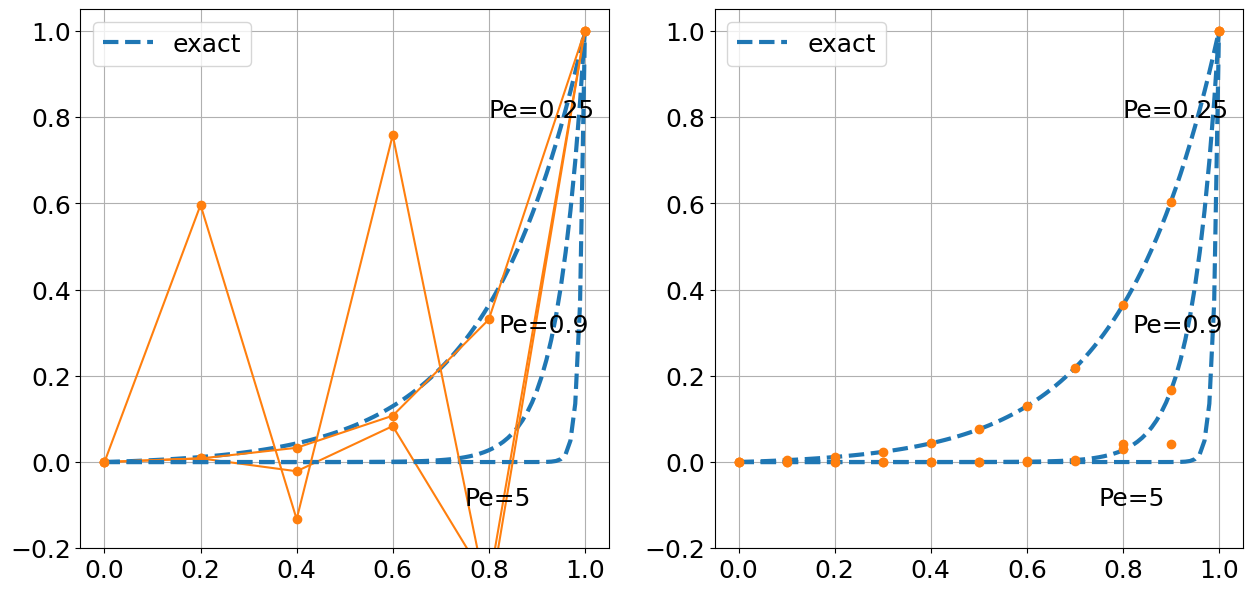

In [13]:
# Reproducing Fig 2.16 of the book Finite Element Methods for Flow Problems

x_space = np.linspace(0,1,101)
x_space_fem= np.linspace(0,1,11)

order = 2
nx = 5
mesh_1d = create_interval(MPI.COMM_WORLD, nx, (0.0, 1.0))

source = 1e-15

left_bc = 0
right_bc = 1

u_SUPG_1, coord_SUPG_1 = steady_adv_diff_1d_SUPG(0.2, order, nx, mesh_1d, source, left_bc, right_bc)

print(coord_1)

# u_SUPG_1_sample = []
# for x in x_space:
#     u_SUPG_1_sample.append(u_SUPG_1(Point(x)))

# Pe = 0.9
u_SUPG_2, coord_SUPG_2 = steady_adv_diff_1d_SUPG(1.0/18, order, nx, mesh_1d, source, left_bc, right_bc)

# u_SUPG_2_sample = []
# for x in x_space:
#     u_SUPG_2_sample.append(u_SUPG_2(Point(x)))

# Pe = 5
u_SUPG_3, coord_SUPG_3 = steady_adv_diff_1d_SUPG(1.0/100, order, nx, mesh_1d, source, left_bc, right_bc)

# u_SUPG_3_sample = []
# for x in x_space:
#     u_SUPG_3_sample.append(u_SUPG_3(Point(x)))
    
fig, ax = plt.subplots(1, 2, figsize=(15,7))
ax[0].plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
#plt.plot(coord_1[ind_1], u_galerkin_1.vector()[ind_1], c='C1', label = 'Galerkin')
# ax[0].plot(x_space, u_galerkin_1_sample, c='C1', label = 'Galerkin')
ax[0].plot(coord_1, u_galerkin_1.vector[:], c='C1')
ax[0].plot(coord_1, u_galerkin_1.vector[:], 'o', c='C1')
ax[0].text(0.8, 0.8, 'Pe=0.25')

ax[0].plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
#plt.plot(coord_2[ind_2], u_galerkin_2.vector()[ind_2], c='C1')
# ax[0].plot(x_space, u_galerkin_2_sample, c='C1')
ax[0].plot(coord_2, u_galerkin_2.vector[:], c='C1')
ax[0].plot(coord_2, u_galerkin_2.vector[:], 'o', c='C1')
ax[0].text(0.82, 0.3, 'Pe=0.9')

ax[0].plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
#plt.plot(coord_3[ind_3], u_galerkin_3.vector()[ind_3], c='C1')
# ax[0].plot(x_space, u_galerkin_3_sample, c='C1')
ax[0].plot(coord_3, u_galerkin_3.vector[:], c='C1')
ax[0].plot(coord_3, u_galerkin_3.vector[:], 'o', c='C1')
ax[0].text(0.75, -0.1, 'Pe=5')

ax[0].set_ylim(-0.2,1.05)
ax[0].grid()
ax[0].legend()

ax[1].plot(x_space, u_solution_1, ls='--', lw=3, c='C0', label='exact')
# ax[1].plot(x_space, u_SUPG_1_sample, c='C1', label = 'Galerkin')
ax[1].plot(coord_SUPG_1, u_SUPG_1.vector[:], 'o', c='C1')
ax[1].text(0.8, 0.8, 'Pe=0.25')

ax[1].plot(x_space, u_solution_2, ls='--', lw=3, c='C0')
# ax[1].plot(x_space, u_SUPG_2_sample, c='C1')
ax[1].plot(coord_SUPG_2, u_SUPG_2.vector[:], 'o', c='C1')
ax[1].text(0.82, 0.3, 'Pe=0.9')

ax[1].plot(x_space, u_solution_3, ls='--', lw=3, c='C0')
# ax[1].plot(x_space, u_SUPG_3_sample, c='C1')
ax[1].plot(coord_SUPG_3, u_SUPG_3.vector[:], 'o', c='C1')
ax[1].text(0.75, -0.1, 'Pe=5')

ax[1].set_ylim(-0.2,1.05)
ax[1].grid()
ax[1].legend()
plt.show()